# Step 1: Fetching the Data from Nsepy Library
# Step 2 : Using Ta-lib Create 3 new columns containing EMA, ADX and RSI
# Step 3: Split the Data into Train and Test
# Step 4: Now Split the data into X_train , X_test and Y_train , Y_test by keep time step as 14
# Step 5: Doing the Training  and Testing using LSTM, BI-LSTM , GRU and BI-GRU
# Step 6: Predicting the prices using the new data

IMPORTING ALL THE NECESSARY PACKAGES REQUIRED TO BUILD THE MODEL

In [1]:
from nsepy import get_history
from datetime import date

Wall time: 1.48 s


In [372]:
#Importing the dependencies
from nsepy import get_history
from datetime import date
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import talib as tl
from talib import EMA , ADX
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,explained_variance_score

In [3]:
#Retrieving The Data 

ril_data =  get_history(symbol="RELIANCE",
                            start=date(2007,1,1),
                            end=date(2021,5,1))

In [4]:
'''power = yf.Ticker("TATASTEEL.NS")
df = power.history(start="2015-01-01", end='2021-04-21')
df.head()'''

'power = yf.Ticker("TATASTEEL.NS")\ndf = power.history(start="2015-01-01", end=\'2021-04-21\')\ndf.head()'

In [5]:
#df.tail()

In [6]:
#Checking the data

ril_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-01-02,RELIANCE,EQ,1270.15,1275.0,1285.8,1270.30,1283.75,1280.90,1279.56,1149902,1.471373e+14,NaN,659158,0.5732
2007-01-03,RELIANCE,EQ,1280.90,1285.0,1290.9,1275.35,1286.00,1284.55,1284.00,1489730,1.912809e+14,NaN,713956,0.4793
2007-01-04,RELIANCE,EQ,1284.55,1290.0,1300.0,1277.00,1280.00,1280.50,1284.95,3022423,3.883671e+14,NaN,1442019,0.4771
2007-01-05,RELIANCE,EQ,1280.50,1275.0,1312.0,1275.00,1289.00,1288.15,1296.98,3047126,3.952073e+14,NaN,1184396,0.3887
2007-01-08,RELIANCE,EQ,1288.15,1294.0,1294.0,1266.60,1275.00,1276.85,1276.26,2191355,2.796739e+14,NaN,1091486,0.4981


In [7]:
ril_data.tail(7)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-22,RELIANCE,EQ,1901.15,1892.25,1914.45,1876.70,1905.10,1906.40,1898.59,6687573,1.269695e+15,209895.0,3155063,0.4718
2021-04-23,RELIANCE,EQ,1906.40,1906.00,1918.90,1895.35,1903.35,1904.35,1907.47,5459016,1.041289e+15,171621.0,2589266,0.4743
2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703,0.4445
2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144,0.4088
2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560,0.4963
2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103,0.3527
2021-04-30,RELIANCE,EQ,2024.05,2008.50,2036.00,1987.55,1995.90,1994.50,2010.20,9150974,1.839532e+15,288687.0,3902504,0.4265


In [8]:
ril_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3.551000e+03,3.551000e+03,2.458000e+03,3.551000e+03,3551.000000
mean,1265.575965,1267.518924,1284.900099,1247.941692,1265.584976,1265.780090,1266.473565,5.705848e+06,7.740889e+14,1.452021e+05,2.529077e+06,0.482343
std,508.063718,510.137753,520.243340,496.894788,508.079952,508.211722,508.396091,5.427826e+06,9.648334e+14,1.297170e+05,1.966351e+06,0.123845
min,676.100000,675.000000,682.800000,673.050000,676.150000,676.100000,676.940000,5.282000e+04,9.037442e+12,2.991000e+03,2.909700e+04,0.103900
25%,906.725000,907.000000,916.550000,895.350000,906.525000,906.725000,905.475000,2.824650e+06,2.889533e+14,7.214700e+04,1.358051e+06,0.399350
50%,1046.500000,1046.900000,1059.350000,1033.250000,1047.250000,1046.500000,1047.520000,4.087936e+06,4.714479e+14,1.021435e+05,2.025707e+06,0.495000
75%,1458.900000,1456.575000,1478.375000,1441.150000,1460.350000,1459.300000,1461.760000,6.517919e+06,8.722020e+14,1.685950e+05,3.030442e+06,0.571500
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300


In [9]:
#setting index as date
ril_data.insert(0, 'Date',  pd.to_datetime(ril_data.index,format='%Y-%m-%d') )

In [10]:
ril_data.shape

(3551, 15)

In [11]:
ril_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-01-02,2007-01-02,RELIANCE,EQ,1270.15,1275.0,1285.8,1270.30,1283.75,1280.90,1279.56,1149902,1.471373e+14,NaN,659158,0.5732
2007-01-03,2007-01-03,RELIANCE,EQ,1280.90,1285.0,1290.9,1275.35,1286.00,1284.55,1284.00,1489730,1.912809e+14,NaN,713956,0.4793
2007-01-04,2007-01-04,RELIANCE,EQ,1284.55,1290.0,1300.0,1277.00,1280.00,1280.50,1284.95,3022423,3.883671e+14,NaN,1442019,0.4771
2007-01-05,2007-01-05,RELIANCE,EQ,1280.50,1275.0,1312.0,1275.00,1289.00,1288.15,1296.98,3047126,3.952073e+14,NaN,1184396,0.3887
2007-01-08,2007-01-08,RELIANCE,EQ,1288.15,1294.0,1294.0,1266.60,1275.00,1276.85,1276.26,2191355,2.796739e+14,NaN,1091486,0.4981


In [12]:
#ADDING THE 3 INDICATORS EMA, RSI  AND ADX USING THE TIME PERIOD OF 30 DAYS

ril_data['EMA_LONG'] = tl.EMA(ril_data['Close'], timeperiod = 30)
ril_data['ADX'] = tl.ADX(ril_data['High'],ril_data['Low'], ril_data['Close'], timeperiod=30)
ril_data['RSI'] = tl.RSI(ril_data['Close'],30)


In [13]:
ril_data.dropna(inplace = True)

In [14]:
ril_data.shape

(2458, 18)

In [15]:
# DATASET AFTER ADDING THE 3 INDICATORS TO OUR ORIGINAL DATAFRAME
ril_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,EMA_LONG,ADX,RSI
Date,,,,,,,,,,,,,,,,,,
2011-06-01,2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.5,946.80,947.83,1838452,1.742538e+14,58630.0,901415,0.4903,950.562081,12.689752,46.883281
2011-06-02,2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.5,951.05,947.09,2152963,2.039039e+14,63061.0,1066759,0.4955,950.593560,12.535313,47.563386
2011-06-03,2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.0,934.60,951.69,4368279,4.157238e+14,128784.0,1035791,0.2371,949.561717,12.211535,45.243833
2011-06-06,2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.6,937.75,935.29,1405741,1.314771e+14,43384.0,476631,0.3391,948.799671,11.942167,45.767744
2011-06-07,2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.6,958.25,950.55,4025919,3.826839e+14,88703.0,2424958,0.6023,949.409370,11.663030,49.049733


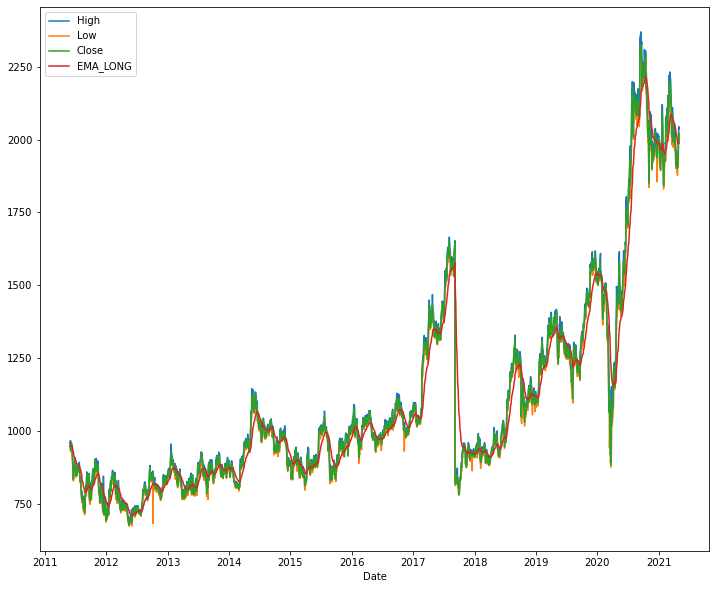

In [16]:
ril_data[['High','Low','Close','EMA_LONG']].plot(figsize=(12,10))
plt.show()

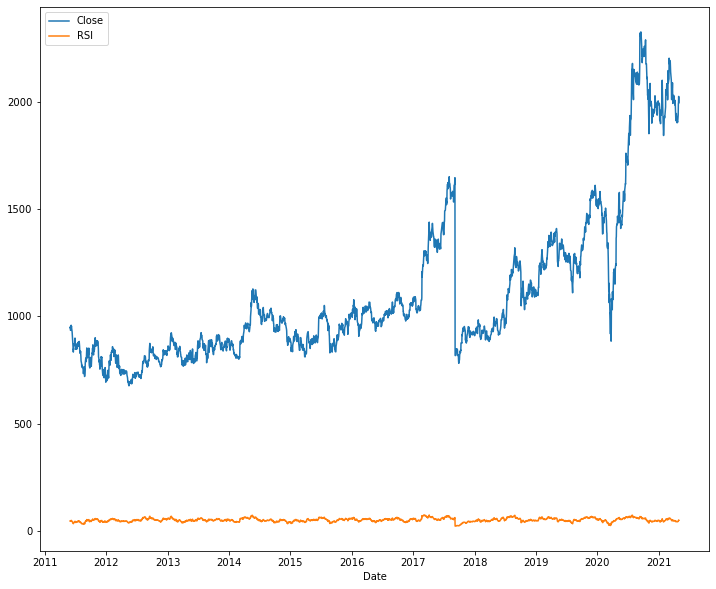

In [17]:
ril_data[['Close','RSI']].plot(figsize=(12,10))
plt.show()

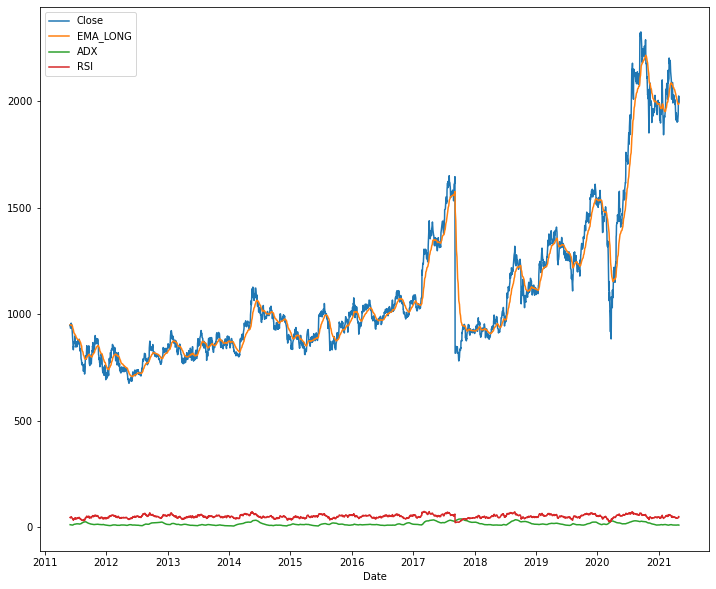

In [18]:
ril_data[['Close','EMA_LONG','ADX','RSI']].plot(figsize=(12,10))
plt.show()

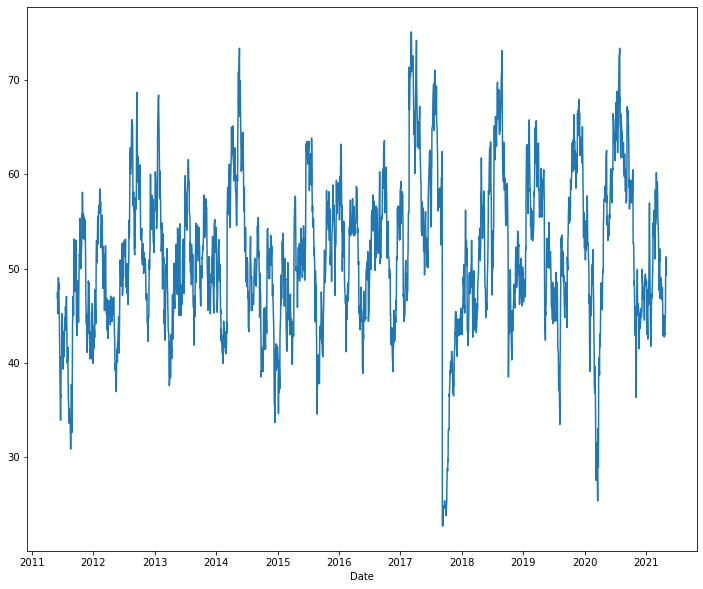

In [19]:
ril_data['RSI'].plot(figsize=(12,10))
plt.show()

In [20]:
#CHECKING THE COLUMNS IN THE DATASET
cols  = ril_data.columns
cols

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'EMA_LONG', 'ADX', 'RSI'],
      dtype='object')

In [21]:
ril_data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,EMA_LONG,ADX,RSI
Date,,,,,,,,,,,,,,,,,,
2021-04-26,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.0,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703,0.4445,1984.686093,11.779686,45.489989
2021-04-27,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.2,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144,0.4088,1984.941829,11.563375,48.956481
2021-04-28,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.0,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560,0.4963,1985.739130,11.298852,49.521929
2021-04-29,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.5,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103,0.3527,1988.210799,10.982031,51.249600
2021-04-30,2021-04-30,RELIANCE,EQ,2024.05,2008.50,2036.0,1987.55,1995.90,1994.50,2010.20,9150974,1.839532e+15,288687.0,3902504,0.4265,1988.616554,10.652703,49.320552


In [22]:
# SEPERATING THE DATES TO USE FOR THE FURTHER PLOTTING AFTER TRAINING 

train_dates = pd.to_datetime(ril_data['Date'])

In [23]:

#Variables for training

cols = list(ril_data[['Open', 'High', 'Low','EMA_LONG','ADX','RSI','Close']])

In [24]:
cols

['Open', 'High', 'Low', 'EMA_LONG', 'ADX', 'RSI', 'Close']

In [25]:
df_for_training = ril_data[cols].astype(float)

In [26]:
df_for_training.shape

(2458, 7)

In [27]:
# TRANSFORMING OUR DATASET TO A STANDARD SCALER

Scaler = StandardScaler()

In [28]:
Scaler = Scaler.fit(df_for_training)

In [29]:
df_for_training_scaled = Scaler.transform(df_for_training)

In [30]:
df_for_training_scaled[0:9]

array([[-0.42530566, -0.43710842, -0.41722622, -0.42703165, -0.55003039,
        -0.55462726, -0.43813653],
       [-0.46820437, -0.44794738, -0.43724467, -0.42694047, -0.57174319,
        -0.47152494, -0.4263    ],
       [-0.40170443, -0.41419566, -0.45148314, -0.42992916, -0.61726363,
        -0.75495216, -0.47211435],
       [-0.47347994, -0.48608958, -0.46092846, -0.4321364 , -0.65513455,
        -0.6909353 , -0.46334139],
       [-0.47653422, -0.43340396, -0.44570317, -0.43037043, -0.69437882,
        -0.2899076 , -0.40624752],
       [-0.41628166, -0.44451733, -0.41638037, -0.43040956, -0.73231494,
        -0.45109512, -0.43145237],
       [-0.43780043, -0.43930365, -0.4077809 , -0.42954919, -0.76547577,
        -0.35822058, -0.41808405],
       [-0.41669816, -0.44438013, -0.44993241, -0.43051958, -0.8089205 ,
        -0.52952612, -0.44454219],
       [-0.44960105, -0.47936667, -0.48108788, -0.43495918, -0.83091749,
        -0.85266512, -0.49717994]])

In [31]:
len(df_for_training_scaled)

2458

In [32]:
x_train = []
y_train = []

In [33]:
training_size = int(len(df_for_training_scaled)*0.95)
test_size = len(df_for_training_scaled)-training_size
train_data,test_data=df_for_training_scaled[0:training_size,:],df_for_training_scaled[training_size:len(df_for_training_scaled),:7]

In [34]:
print(train_data.shape,test_data.shape)

(2335, 7) (123, 7)


In [35]:
#test_data[2]

In [36]:
n_future = 1
n_past = 14

In [37]:
# SPLITTING THE DATASET INTO X_TRAIN AND Y_TRAIN USING THE PAST 14 DAYS TIMESTEP

for i in range(n_past, len(train_data) - n_future +1):
    x_train.append(train_data[i - n_past:i, 0:df_for_training.shape[1]])
    y_train.append(train_data[i + n_future - 1:i + n_future, 6])

In [38]:
x_train , y_train = np.array(x_train),np.array(y_train)

In [39]:
x_train.shape

(2321, 14, 7)

In [40]:
y_train.shape

(2321, 1)

In [41]:
x_test= []
y_test = []

for i in range(n_past, len(test_data) - n_future +1):
    x_test.append(test_data[i - n_past:i, 0:df_for_training.shape[1]])
    y_test.append(test_data[i + n_future - 1:i + n_future, 6])

In [42]:
x_test , y_test = np.array(x_test),np.array(y_test)

In [43]:
print(x_test.shape, y_test.shape)

(109, 14, 7) (109, 1)


In [292]:
print(x_test[0])


[[ 2.57760409  2.59903761  2.62261716  3.03185695  0.59028549 -0.66811933
   2.64688179]
 [ 2.55955609  2.49448958  2.16402557  2.98190896  0.61199831 -1.71247835
   2.15378574]
 [ 2.17915976  2.17069254  2.09621661  2.93012863  0.64287258 -1.84300314
   2.07844969]
 [ 2.03199913  2.2255734   2.10157366  2.8934243   0.65851744 -1.34375832
   2.25335187]
 [ 2.35950094  2.31324556  2.36942611  2.86689909  0.65159663 -1.03567723
   2.36976766]
 [ 2.45682131  2.53016213  2.49954601  2.85594148  0.59540276 -0.53326616
   2.57628035]
 [ 2.6570153   2.60973937  2.66265405  2.84971783  0.52450605 -0.39607515
   2.63629854]
 [ 2.69838687  2.66736427  2.67731545  2.8502212   0.44424193 -0.18514582
   2.73057304]
 [ 2.73170626  2.68108448  2.49940503  2.83436914  0.39775251 -0.68315525
   2.48729747]
 [ 2.43183177  2.44358759  2.46246959  2.81632566  0.35894363 -0.77479042
   2.43939432]
 [ 2.43460839  2.52096959  2.50969621  2.80251091  0.30512355 -0.66820374
   2.48506942]
 [ 2.52595904  2.4623

# BUILDING A UNI-DIRECTIONAL LSTM MODEL AND PREDICTING THE STOCK PRICE

In [106]:
model_unilstm = Sequential()
model_unilstm.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))
model_unilstm.add(LSTM(60, activation='relu', return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))
model_unilstm.add(LSTM(60,activation = 'relu',return_sequences = False))
model_unilstm.add(Dense(64,activation = 'relu'))
model_unilstm.add(Dense(1,activation ='relu'))

In [107]:
model_unilstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 14, 60)            16320     
_________________________________________________________________
lstm_11 (LSTM)               (None, 14, 60)            29040     
_________________________________________________________________
lstm_12 (LSTM)               (None, 60)                29040     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                3904      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 78,369
Trainable params: 78,369
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_unilstm.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])

In [109]:
%%time
# FITTING THE MODEL FOR TRAINING
history = model_unilstm.fit(x_train,y_train , epochs=20, batch_size = 32)

Epoch 1/20
73/73 [==============================] - 6s 24ms/step - loss: 0.4025 - mae: 0.5235
Epoch 2/20
73/73 [==============================] - 2s 23ms/step - loss: 0.2997 - mae: 0.4529
Epoch 3/20
73/73 [==============================] - 2s 23ms/step - loss: 0.3156 - mae: 0.4540
Epoch 4/20
73/73 [==============================] - 2s 23ms/step - loss: 0.2932 - mae: 0.4440
Epoch 5/20
73/73 [==============================] - 2s 23ms/step - loss: 0.2934 - mae: 0.4453
Epoch 6/20
73/73 [==============================] - 2s 23ms/step - loss: 0.2917 - mae: 0.4426
Epoch 7/20
73/73 [==============================] - 2s 24ms/step - loss: 0.2900 - mae: 0.4393
Epoch 8/20
73/73 [==============================] - 2s 24ms/step - loss: 0.2901 - mae: 0.4402
Epoch 9/20
73/73 [==============================] - 2s 24ms/step - loss: 0.2883 - mae: 0.4373
Epoch 10/20
73/73 [==============================] - 2s 31ms/step - loss: 0.2886 - mae: 0.4368
Epoch 11/20
73/73 [==============================] - 2s 32m

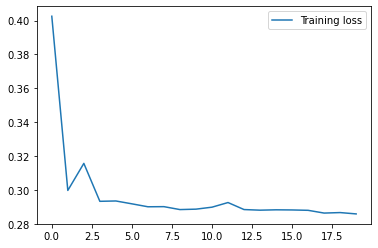

In [110]:
#CHECKING THE TRAINING LOSS

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [360]:
train_predict_uni = model_unilstm.predict(x_train)
test_predict_uni = model_unilstm.predict(x_test)

In [389]:
# mean squared error of train and test of Unidirectional LSTM model
train_score = mean_squared_error(y_train,train_predict_uni)
test_score = mean_squared_error(y_test,test_predict_uni)

In [390]:
print(train_score,test_score)

0.28326871299620154 0.022603835442257702


Checking for the error using mae 

In [361]:
# Root Mean Squared Error of train and test of Unidirectional LSTM model
train_score_rmse = math.sqrt(mean_squared_error(y_train,train_predict_uni))
test_score_rmse = math.sqrt(mean_squared_error(y_test,test_predict_uni))

In [362]:
print(train_score_rmse,test_score_rmse)

0.5322299437237645 0.15034571973374466


In [363]:
#findind the mean absolute error
print(mean_absolute_error(y_train,train_predict_uni))
print(mean_absolute_error(y_test,test_predict_uni))

0.42383493773312375
0.11882718162745723


In [374]:
print(explained_variance_score(y_train,train_predict_uni))
print(explained_variance_score(y_test,test_predict_uni))

0.8210624583819113
0.5702532863202889


In [325]:
# PREDICTING THE Last 20 DAYS STOCK PRICE of the test set


next_future=20  #Redefining n_future to extend prediction dates beyond original n_future dates
forecast_period_dates = pd.date_range(list(train_dates)[-13], periods=next_future, freq='1d').tolist()

In [326]:
forecast = model_unilstm.predict(x_test[-next_future:]) #forecast 

In [327]:
forecast

array([[2.7468903],
       [2.7218916],
       [2.7110274],
       [2.6814084],
       [2.6508238],
       [2.651786 ],
       [2.646942 ],
       [2.6175776],
       [2.5251718],
       [2.489854 ],
       [2.47362  ],
       [2.4468515],
       [2.387375 ],
       [2.3526797],
       [2.3259778],
       [2.302873 ],
       [2.327133 ],
       [2.390762 ],
       [2.441096 ],
       [2.4945385]], dtype=float32)

In [329]:
#Perform inverse transformation to rescale back to original range
#Since we used 7 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 7 times and discard them after inverse transform


forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = Scaler.inverse_transform(forecast_copies)[:,6]

In [330]:
# THESE ARE OUR STOCK PRICES WHICH IS PREDICTED BY ALGORITHM FOR THE NEXT 90 DAYS 

y_pred_future

array([2090.409 , 2081.4329, 2077.532 , 2066.897 , 2055.9155, 2056.261 ,
       2054.5215, 2043.9781, 2010.7991, 1998.118 , 1992.289 , 1982.6776,
       1961.3221, 1948.8645, 1939.277 , 1930.981 , 1939.6917, 1962.5382,
       1980.6111, 1999.7999], dtype=float32)

In [331]:
# Convert timestamp to date

forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [332]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [333]:
df_forecast.shape

(20, 2)

In [334]:
original = ril_data[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])

<ipython-input-334-91d7ae62dbb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [335]:
original = original.loc[(original['Date'] >= '2020-5-1') & (original['Date'] <= '2021-04-12')]

C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

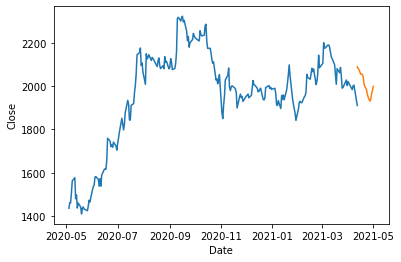

In [336]:
# PLOTTING THE CLOSING PRICE OF NEXT 20 DAYS with existing closing price of unidirectional LSTM

sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])

# BUILDING A BI-DIRECTIONAL LSTM MODEL FOR FORECASTING 

In [248]:
def create_BILSTM():
    in_seq = Input(shape = (x_train.shape[1], 7))
      
    x = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))(in_seq)
    x = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))(x)       
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(64,activation = 'relu')(conc)
    out = Dense(1, activation="linear")(conc)      

    model = Model(inputs=in_seq, outputs=out)
    model.compile(loss="mse", optimizer="adam", metrics=['mae'])    
    return model

In [249]:
model_bilstm = create_BILSTM()

In [250]:
model_bilstm.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 14, 7)]      0                                            
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 14, 200)      86400       input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_10 (Bidirectional (None, 14, 200)      240800      bidirectional_9[0][0]            
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 200)          0           bidirectional_10[0][0]           
____________________________________________________________________________________________

In [251]:
model_bilstm.compile(optimizer = 'adam',loss = 'mse',metrics = ['mae'])

In [252]:
%%time
# fit model
history = model_bilstm.fit(x_train,y_train , epochs=20, batch_size=32)

Epoch 1/20
73/73 [==============================] - 17s 114ms/step - loss: 0.0662 - mae: 0.1533
Epoch 2/20
73/73 [==============================] - 9s 125ms/step - loss: 0.0194 - mae: 0.0890
Epoch 3/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0178 - mae: 0.0861
Epoch 4/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0151 - mae: 0.0812
Epoch 5/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0179 - mae: 0.0860
Epoch 6/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0169 - mae: 0.0859
Epoch 7/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0174 - mae: 0.0860
Epoch 8/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0144 - mae: 0.0757
Epoch 9/20
73/73 [==============================] - 10s 135ms/step - loss: 0.0125 - mae: 0.0739
Epoch 10/20
73/73 [==============================] - 10s 136ms/step - loss: 0.0128 - mae: 0.0729
Epoch 11/20
73/73 [=====================

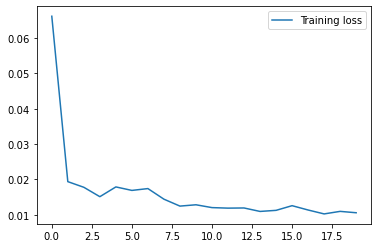

In [253]:
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [391]:
train_predict_bilstm = model_bilstm.predict(x_train)
test_predict_bilstm = model_bilstm.predict(x_test)

In [392]:
train_score = mean_squared_error(y_train,train_predict_bilstm)
test_score = mean_squared_error(y_test,test_predict_bilstm)

In [393]:
print(train_score,test_score)

0.01106882169171196 0.06128707379808184


In [373]:
print(explained_variance_score(y_train,train_predict_bilstm))
print(explained_variance_score(y_test,test_predict_bilstm))

0.9844437866785058
0.6604361873183728


In [367]:
print(mean_absolute_error(y_train,train_predict_bilstm))
print(mean_absolute_error(y_test,test_predict_bilstm))

0.06366270581160335
0.21789968502136825


In [371]:
print(mean_absolute_percentage_error(y_train,train_predict_bilstm))
print(mean_absolute_percentage_error(y_test,test_predict_bilstm))

0.8027832480618506
0.08944944369959917


In [317]:
#Forecasting...
#Start with the last day in training date and predict future...
next_future=20  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-13], periods=next_future, freq='1d').tolist()

In [318]:
forecast = model_bilstm.predict(x_test[-next_future:])  #forecast 

In [319]:
forecast

array([[2.822046 ],
       [2.792045 ],
       [2.790043 ],
       [2.747699 ],
       [2.714547 ],
       [2.721176 ],
       [2.7186682],
       [2.6876984],
       [2.5837083],
       [2.552839 ],
       [2.5404053],
       [2.5138915],
       [2.4544575],
       [2.4225118],
       [2.3999214],
       [2.3826096],
       [2.4223154],
       [2.5087411],
       [2.5682707],
       [2.6410477]], dtype=float32)

In [320]:
#Perform inverse transformation to rescale back to original range
#Since we used 7 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 7 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = Scaler.inverse_transform(forecast_copies)[:,6]

In [321]:
y_pred_future

array([2117.394 , 2106.622 , 2105.9033, 2090.6992, 2078.7957, 2081.1758,
       2080.2754, 2069.1555, 2031.817 , 2020.7333, 2016.2688, 2006.7488,
       1985.4086, 1973.9382, 1965.8269, 1959.611 , 1973.8677, 2004.8995,
       2026.274 , 2052.4053], dtype=float32)

In [322]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [323]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [324]:
df_forecast.shape

(20, 2)

In [266]:
original = ril_data[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])

<ipython-input-266-91d7ae62dbb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [267]:
original = original.loc[(original['Date'] >= '2020-5-1') & (original['Date'] <= '2021-04-12')]

C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

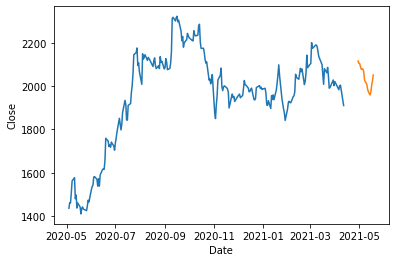

In [268]:
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])

# USING GRU (GATED RECURRENT UNIT) FOR STOCK PRICE PREDICTION 

In [274]:
# Create GRU model
def create_gru():
    model = Sequential()
    # Input layer
    model.add(GRU (units = 64, return_sequences = True, 
    input_shape = [x_train.shape[1], x_train.shape[2]]))
    model.add(Dropout(0.2)) 
    model.add(GRU(units = 64,return_sequences = True))
    model.add(GRU(units = 64))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse',metrics = ['mae'])
    return model

In [275]:

model_gru = create_gru() 

In [276]:
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 14, 64)            14016     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
gru_7 (GRU)                  (None, 14, 64)            24960     
_________________________________________________________________
gru_8 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [277]:
%%time
# fit model

history_gru = model_gru.fit(x_train,y_train , epochs= 20, batch_size=32)

Epoch 1/20
73/73 [==============================] - 7s 29ms/step - loss: 0.0821 - mae: 0.1769
Epoch 2/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0219 - mae: 0.0998
Epoch 3/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0196 - mae: 0.0943
Epoch 4/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0184 - mae: 0.0906
Epoch 5/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0157 - mae: 0.0832
Epoch 6/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0151 - mae: 0.0794
Epoch 7/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0155 - mae: 0.0808
Epoch 8/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0144 - mae: 0.0801
Epoch 9/20
73/73 [==============================] - 2s 29ms/step - loss: 0.0141 - mae: 0.0788: 0s - loss: 0.0145 - mae: 0.
Epoch 10/20
73/73 [==============================] - 2s 31ms/step - loss: 0.0146 - mae: 0.0768
Epoch 11/20
73/73 [===========

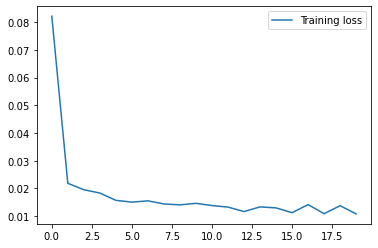

In [278]:
plt.plot(history_gru.history['loss'], label='Training loss')
plt.legend()

In [375]:
train_predict_unigru = model_gru.predict(x_train)
test_predict_unigru = model_gru.predict(x_test)

In [377]:
print(mean_squared_error(y_train,train_predict_unigru))
print(mean_squared_error(y_test,test_predict_unigru))

0.0064114899587317175
0.011875807272136695


In [379]:
print(mean_absolute_error(y_train,train_predict_unigru))
print(mean_absolute_error(y_test,test_predict_unigru))

0.047287372353027296
0.0838892825628958


In [381]:
print(explained_variance_score(y_train,train_predict_unigru))
print(explained_variance_score(y_test,test_predict_unigru))

0.9910273412005691
0.7397057994642782


In [337]:
#Forecasting...
#Start with the last day in training date and predict future...
next_future=20  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-13], periods=next_future, freq='1d').tolist()

In [338]:
forecast = model_gru.predict(x_test[-next_future:]) #forecast 

In [339]:
forecast

array([[2.5682638],
       [2.5332017],
       [2.5494382],
       [2.4977343],
       [2.4698064],
       [2.50804  ],
       [2.5066538],
       [2.4607098],
       [2.3136938],
       [2.3138876],
       [2.3183243],
       [2.2908142],
       [2.2084305],
       [2.1976163],
       [2.1827416],
       [2.1775072],
       [2.2555473],
       [2.355023 ],
       [2.4053543],
       [2.4853184]], dtype=float32)

In [340]:
#Perform inverse transformation to rescale back to original range
#Since we used 7 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 7 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = Scaler.inverse_transform(forecast_copies)[:,6]

In [341]:
y_pred_future

array([2026.2716, 2013.6823, 2019.5121, 2000.9474, 1990.9197, 2004.6477,
       2004.15  , 1987.6534, 1934.8662, 1934.9358, 1936.5289, 1926.6511,
       1897.0707, 1893.1877, 1887.8468, 1885.9674, 1913.9883, 1949.7058,
       1967.7777, 1996.4894], dtype=float32)

In [342]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [343]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [344]:
df_forecast.shape

(20, 2)

In [345]:
original = ril_data[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])

<ipython-input-345-91d7ae62dbb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [347]:
original = original.loc[(original['Date'] >= '2020-5-1') & (original['Date'] <= '2021-04-12')]

C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

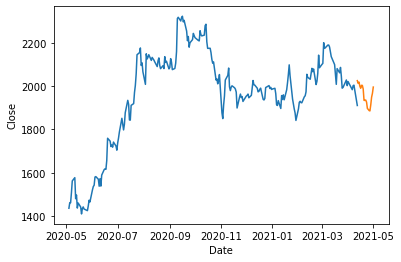

In [348]:
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])

# USING THE ADVANCE VARIANT BI-GRU (BIDIRECTIONAL GATED RECCURENT 

In [293]:
def bidirectional_gru():
    in_seq = Input(shape = (x_train.shape[1], 7))
      
    x = Bidirectional(GRU(64, return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))(in_seq)
    x = Bidirectional(GRU(64, return_sequences=True))(x)    
    x= Bidirectional(GRU(64,return_sequences = True))(x)
          
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(32, activation="relu")(conc)
    out = Dense(1, activation="linear")(conc)      

    model = Model(inputs=in_seq, outputs=out)
    model.compile(loss="mse", optimizer="adam", metrics=['mae'])    
    return model

In [294]:
model_bigru = bidirectional_gru()

In [295]:
model_bigru.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 14, 7)]      0                                            
__________________________________________________________________________________________________
bidirectional_11 (Bidirectional (None, 14, 128)      28032       input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 14, 128)      74496       bidirectional_11[0][0]           
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 14, 128)      74496       bidirectional_12[0][0]           
____________________________________________________________________________________________

In [296]:
%%time
history_bigru = model_bigru.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
73/73 [==============================] - 17s 58ms/step - loss: 0.0632 - mae: 0.1511
Epoch 2/20
73/73 [==============================] - 4s 54ms/step - loss: 0.0212 - mae: 0.0944
Epoch 3/20
73/73 [==============================] - 4s 54ms/step - loss: 0.0230 - mae: 0.1041
Epoch 4/20
73/73 [==============================] - 4s 56ms/step - loss: 0.0179 - mae: 0.0859
Epoch 5/20
73/73 [==============================] - 4s 57ms/step - loss: 0.0167 - mae: 0.0875
Epoch 6/20
73/73 [==============================] - 4s 57ms/step - loss: 0.0163 - mae: 0.0853
Epoch 7/20
73/73 [==============================] - 4s 53ms/step - loss: 0.0151 - mae: 0.0815
Epoch 8/20
73/73 [==============================] - 4s 53ms/step - loss: 0.0129 - mae: 0.0729
Epoch 9/20
73/73 [==============================] - 4s 52ms/step - loss: 0.0117 - mae: 0.0699
Epoch 10/20
73/73 [==============================] - 4s 53ms/step - loss: 0.0130 - mae: 0.0745
Epoch 11/20
73/73 [==============================] - 4s 56

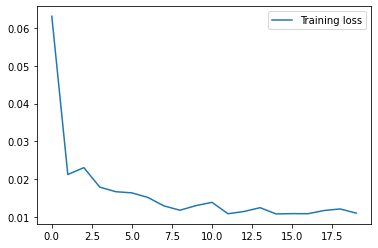

In [297]:
plt.plot(history_bigru.history['loss'], label='Training loss')
plt.legend()

In [394]:
train_predict_bigru = model_bigru.predict(x_train)
test_predict_bigru = model_bigru.predict(x_test)

In [395]:
train_score = mean_squared_error(y_train,train_predict_bigru)
test_score = mean_squared_error(y_test,test_predict_bigru)

In [396]:
print(train_score,test_score)

0.006773810369655946 0.016409908024064248


In [397]:
print(mean_absolute_error(y_train,train_predict_bigru))
print(mean_absolute_error(y_test,test_predict_bigru))

0.04937529006431572
0.10000626834608295


In [398]:
print(explained_variance_score(y_train,train_predict_bigru))
print(explained_variance_score(y_test,test_predict_bigru))

0.9906352791707136
0.6911161399575595


In [349]:
#Forecasting...
#Start with the last day in training date and predict future...
next_future=20  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-13], periods=next_future, freq='1d').tolist()

In [350]:
forecast = model_bigru.predict(x_test[-next_future:]) #forecast 

In [351]:
forecast

array([[2.5225134],
       [2.5036502],
       [2.5023177],
       [2.4663422],
       [2.4242237],
       [2.4332821],
       [2.4414318],
       [2.4024758],
       [2.2916203],
       [2.2389612],
       [2.2441115],
       [2.2345347],
       [2.1764083],
       [2.1417243],
       [2.1300218],
       [2.119206 ],
       [2.1752486],
       [2.284824 ],
       [2.354614 ],
       [2.4175391]], dtype=float32)

In [352]:
#Perform inverse transformation to rescale back to original range
#Since we used 7 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 7 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = Scaler.inverse_transform(forecast_copies)[:,6]

In [353]:
y_pred_future

array([2009.8446, 2003.0715, 2002.5931, 1989.6759, 1974.5529, 1977.8054,
       1980.7316, 1966.7441, 1926.9406, 1908.033 , 1909.8822, 1906.4436,
       1885.5728, 1873.1193, 1868.9174, 1865.0338, 1885.1564, 1924.5002,
       1949.559 , 1972.1527], dtype=float32)

In [354]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [355]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [356]:
df_forecast.shape

(20, 2)

In [357]:
original = ril_data[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])

<ipython-input-357-91d7ae62dbb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [358]:
original = original.loc[(original['Date'] >= '2020-5-1') & (original['Date'] <= '2021-04-12')]

C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mvcc1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

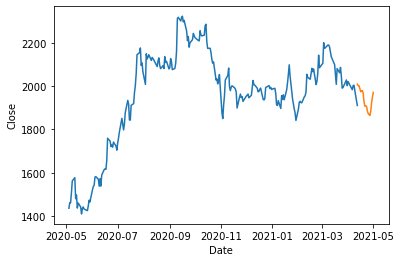

In [359]:
sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])